<a href="https://colab.research.google.com/github/JaledMC/Learning-Artificial-Vision/blob/master/arithmetic_operations_videos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arithmetic operations on videos

In [0]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Overlap a ROI

As we said with images, OpenCV use numpy matrix, and we can take some pixel form one part of the frame and put them in other area.

In [0]:
cap = cv2.VideoCapture(1)
 
while(True):
    _, frame = cap.read()
    # Substract a ROI of the frame. Select and change pixel regions
    frame[55:105, 55:105] = frame[70:120, 130:180]  # Change one region for another
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Adding two videos. Basic method

The same apply for adding to frames. It's like in the images examples. Use two cameras in this case.

In [0]:
# Instance two video objects
cap1 = cv2.VideoCapture(0)
cap2 = cv2.VideoCapture(1)
 
while(True):
  # read both frames
  _, frame1 = cap1.read()
  _, frame2 = cap2.read()

  # Mix both frames. They must have same dimensions. Adjust their wheights
  frame_mixed = cv2.addWeighted(frame1, 0.7, frame2, 0.3, 0) # image1, weight1, image2, weight2, alpha
  
  cv2.imshow('frame', frame_mixed)
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

## Adding an image with no regular shape to a video

To add an image to a video, the background of both ROIs must be removed, to apply add() without change any other pixel. To do that, we have to detect the border with a filter on the image, obtain the mask and add the image to the video.

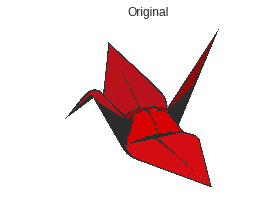

In [0]:
# download the image
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://raw.githubusercontent.com/JaledMC/Learning-Artificial-Vision/master/images/origami.png')
img = Image.open(BytesIO(response.content))
img.save("origami.png")
# Represent the image
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.imshow(img)
axes.set_title('Original')
plt.axis("off");

image = cv2.imread('origami.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [0]:
cap = cv2.VideoCapture(1)
 
while(True):
    _, frame = cap.read()
    """Reduce the image that is going to be added (we want it smaller than base image).
    Obtain too the area where all this oporation is done, the ROI.
    Select first the roi of base image with same area that added image"""
    image_resized = cv2.resize(image, (300, 300))
    row, col, channels = image_resized.shape
    roi = frame[0:row, 0:col]
  
    # Convert image2 to gray and apply threshold to obtain a binary mask (and his inverse)
    image2gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(image2gray, 0, 255,  cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    mask_inv = cv2.bitwise_not(mask)
  
    # Subsctrat pixels of the roi where the image2 will be added, and substract the background of the image2
    substracted = cv2.bitwise_and(roi,roi,mask = mask)
    stick = cv2.bitwise_and(image_resized,image_resized, mask = mask_inv)
    
    # Add the substracted and the image without background, and add this modified ROI to the original image
    _, frame = cap.read()
    mix = cv2.add(substracted, stick)
    frame[0:row, 0:col] = mix
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()